In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
# Load dataset
# get data_dir for tranining

img_height = 224
img_width = 224
batch_size = 64

# set test dataset
test_data_dir = '../Vegetable_Images\\test/'
test_ds = keras.utils.image_dataset_from_directory(
    test_data_dir,
    label_mode='categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle=False
)

class_names = test_ds.class_names
class_num = len(class_names)

# scale data
data_scaling = keras.layers.Rescaling(scale=1./255)
test_ds = test_ds.map( lambda x, y: (data_scaling(x), y))

Found 3000 files belonging to 15 classes.


In [3]:
# Load model
model = tf.keras.models.load_model('../saved_models\\VGG16_Model.keras')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │        15,375 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,834,223 (350.32 MB)

 Trainable params: 25,706,511 (98.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,413,024 (196.13 MB)

In [3]:
# test-accuracy
test_accuracy = model.evaluate(test_ds)
print(test_accuracy)
print(f'{np.round(test_accuracy[1]*100, 2)}%')

47/47 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9958 - loss: 0.0151
[0.0127825066447258, 0.9963333606719971]
99.63%


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Input shape: (1, 224, 224, 3)
Output shape: (1, 15)
Output : [[3.8884536e-08 1.0250263e-05 9.2983214e-08 2.1175993e-07 6.2612395e-07
  3.9186821e-06 1.4117394e-07 3.1097531e-07 9.9997568e-01 7.1968412e-07
  4.3636501e-08 1.8692214e-06 5.8234323e-06 2.8425222e-07 1.2022483e-07]]
Predicted Class: Cauliflower


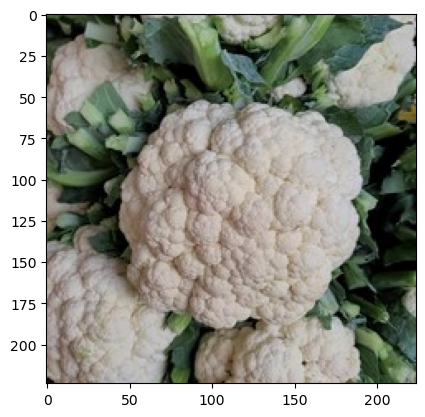

In [3]:
# Predict
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
# load image
img = cv.imread('../Vegetable_Images\\test\\Cauliflower\\1086.jpg')[...,::-1]

def predict(model, img):
    class_names = np.array(
        ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 
         'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
    )
    # ensure img right to input shape
    # img = img/255
    img = img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img, 0)

    # predict
    predictions = model.predict(img_array)
    class_predicted = class_names[np.argmax(predictions)]
    return predictions, class_predicted, img_array
    

predictions, class_predicted, img_array = predict(model, img)

print(f'Input shape: {img_array.shape}')
print(f'Output shape: {predictions.shape}')
print(f'Output : {predictions}')
print(f'Predicted Class: {class_predicted}')
plt.imshow(img)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(test_ds)

true_labels = []
for _,n in test_ds:
    for label in n:
        true_labels.append(class_names[np.argmax(label)])

predicted_labels = []
for prediction in predictions:
    predicted_labels.append(class_names[np.argmax(prediction)])

print(true_labels[0])
print(predicted_labels[0])


cfd = ConfusionMatrixDisplay.from_predictions(
    y_true=true_labels,
    y_pred=predicted_labels,
    labels=class_names,
    cmap='Blues',
    ax=plt.subplots(figsize=(10, 10))[1],
    xticks_rotation='vertical',
)

45/47 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step

In [ ]:
# precision, recall, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_labels, predicted_labels, labels=class_names, average='weighted')
recall = recall_score(true_labels, predicted_labels, labels=class_names, average='weighted')
f1_score = f1_score(true_labels, predicted_labels, labels=class_names, average='weighted')


print(np.round(precision, 4))
print(np.round(recall, 4))
print(np.round(f1_score, 4))